**Chris DeGrendele** 

This is a notebook where I go through the following course, implementing some ideas and lessons.
https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=1

---

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
from random import random
from numpy.random import rand

# Univariate Linear Regression
Assume a linear hypothesis:
$h_{\theta}(x) = \theta_0 + \theta_1x$

Minimize:
J$(\theta_0, \theta_1)$ = $\frac{1}{2N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$
 
 $\implies$ This is our **cost** function
 
 Our algorithm:
         $\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1)$

In [7]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 5, 7, 6, 8, 9 ,12])

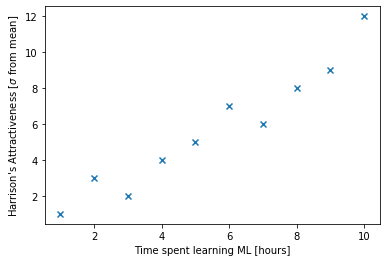

In [8]:
plt.scatter(x,y, marker='x')
plt.xlabel("Time spent learning ML [hours]")
plt.ylabel("Harrison's Attractiveness $[\sigma$ from mean]");

We will solve this using **batch gradient descent**

$$\theta_j =\theta_j -\alpha* \frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1) \text{ for } j = 0,1$$

where $$\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)*x^{(i)}$$

In [9]:
def H(x, θ_0, θ_1):
    return θ_0 + x*θ_1

def cost(x,y,θ_0,θ_1):
    sum = 0
    for i in range(len(x)):
        sum += ( H(x[i], θ_0, θ_1) - y[i] )**2
    return 1/(2*len(x)) * sum
    

def gradient_descent(x, y, α, tol, verbose=True):
    assert len(x) == len(y)
    N = len(x) 
    
    θ_0, θ_1 = random(), random()
    
    while cost(x,y,θ_0,θ_1) > tol:
        if verbose: print("Cost: ",cost(x,y,θ_0,θ_1))
        temp0, temp1 = 0,0
        for i in range(N):
            temp0 += H(x[i], θ_0, θ_1) - y[i]
            temp1 += (H(x[i], θ_0, θ_1) - y[i])*x[i]

        θ_0 = θ_0 - α*temp0/N
        θ_1 =  θ_1 - α*temp1/N



    return θ_0, θ_1

In [10]:
θ_0, θ_1 = gradient_descent(x,y,.01,0.5)

Cost:  16.25080433871334
Cost:  6.307462128866269
Cost:  2.642237486284543
Cost:  1.2909411559696444
Cost:  0.7924913802402113
Cost:  0.6083770580706777
Cost:  0.5401190756679873
Cost:  0.5145639531343361
Cost:  0.5047494958254536
Cost:  0.5007382371545509


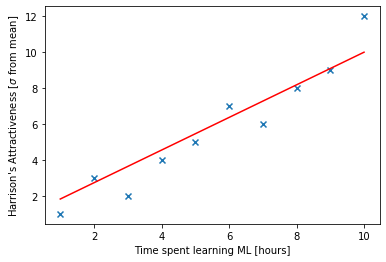

In [11]:
plt.scatter(x,y, marker='x')
plt.plot(x, θ_0+ x*θ_1, color="red")
plt.xlabel("Time spent learning ML [hours]")
plt.ylabel("Harrison's Attractiveness $[\sigma$ from mean]");

# Multivariate Linear Regression
$x^{(i)}_j\equiv$ value of feature j in $i^{th}$ training example 

Our hypothesis now takes the form: $h_{\theta} = \theta_0 + \Sigma ^N _{i = 1} x_i \theta_i$

For convience of notation, we can let $x_0 = 1$

such that: $h_{\theta} = \vec{\Theta}^T\vec{X}$

J is then: J$(\vec{\Theta})$ = $\frac{1}{2N}\Sigma ^N_{i=1} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$

and finally our algorithm:
$\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j}J(\vec{\Theta})$

$\theta_j := \theta_j -\alpha \frac{1}{N} \Sigma ^N _{i=1} \left( h_{\theta} (x^{(i)}) - y^{(i)} \right)x^{(i)}_j$ simultaneously update $\theta_j$ for all j

In [51]:
def H(x, θ): 
    return np.dot(x,θ)

def cost(X, z, θ):
    sum = 0
    for i in range(len(X[1])):
        sum += ( H(X[:,i], θ) - z[i] )**2
    return 1/(2*len(X[1])) * sum
    

def multi_gradient_descent(X, z, α,tol, verbose=True):
    '''X is an [i,j] matrix where i is the number of training 
    variables and j is the number of points.
    z is the solution
    α is the learning rate, proportional to the size of steps
    tol is the tolerance of the solution accepted, evaulated 
    by the cost()'''
    
    assert len(X[0]) == len(z)
    
    X = np.vstack( (np.ones(len(X[1])), X) ) #add row of x_0's = 1
    N, N_p = X.shape #Number of θ, Number of points

    θ = rand(N)
    
    while cost(X, z, θ) > tol:
        
        if verbose: print("Cost: ",cost(X, z, θ))
        temp = np.zeros(N)
        for j in range(N):
            for i in range(N_p):
                temp += (H(X[:,i], θ) - z[i])*X[j,i]

        θ = θ - α*temp/N

    return θ

Cost:  0.24063650617904164
Cost:  0.23852585458013598
Cost:  0.23644003519831536
Cost:  0.23437875587782778
Cost:  0.23234172790018826
Cost:  0.2303286659437415
Cost:  0.2283392880436937
Cost:  0.2263733155526221
Cost:  0.22443047310144273
Cost:  0.22251048856084152
Cost:  0.22061309300315735
Cost:  0.21873802066471493
Cost:  0.21688500890859763
Cost:  0.21505379818786352
Cost:  0.21324413200918838
Cost:  0.2114557568969423
Cost:  0.20968842235768304
Cost:  0.20794188084507148
Cost:  0.20621588772519914
Cost:  0.20451020124232056
Cost:  0.20282458248499322
Cost:  0.2011587953526134


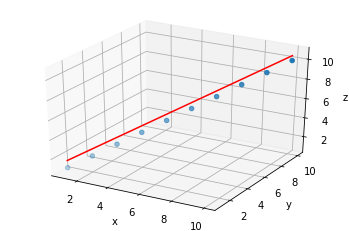

In [52]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,6,7,8,9,10]
z = [1,2,3,4,5,6,7,8,9,10]

X = np.array([x,y])
θ = multi_gradient_descent(X, z, .00001, 0.2, verbose=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z)
ax.plot(x,y, θ[0] + np.array(x)*θ[1] + np.array(y)*θ[2], color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z  ');

**Notes about gradient descent:**

It will most likely get stuck in a local minima and not find a global minimum. 

Feature scaling - make sure features are on a similiar scale. If scale is too big in one direction, it will have a much harder time because it will traverse in the direction of steepest descent. Generally, just get all features in the -1 < $x_i$ < 1

- Mean normalization - replace $x_i$ with $x_i - \mu_i$ to make features have an approximatley zero mean. Obviously don't apply to $x_0$ which is just an array of 1s

How to choose a learning rate $\alpha$:
- Cost function $J(\theta)$ should decrease after every iteration
- plot of cost function vs no. of iterations can be helpful in seeing whats going on
- If $\alpha$ is too small, there will be a slow convergence. If it's too large, it may not decrease on every iteration, may not converge at all.

# Polynomial Regression

Lets say we know housing cost scales as a function of area. But it's not linear, it's say cubic plus a squareroot term. Letting x = area we can write our cost function:

Cost = $\theta_0 +\theta_1 x_1 + \theta_2 x^2 + \theta_3x^3 + \theta_4 \sqrt{x}$

by writing it in this nature, this still enables us to use all our tools for linear regression, with just a simple switch of cost function.

In [53]:
def H(x, θ): 
    return x[0]*θ[0] + x[1]*θ[1] * x[1]**2*θ[2] + x[1]**3*θ[3] + x[1]*np.sqrt(x[1])

x = [1,2,3,4,5,6,7,8,9,10]
z = [1,2,3,4,5,6,7,8,9,10]

X = np.array(x)**2
fixed = False
if fixed:
#in order for this to work i need to restructure multi_gradient_descent to independely input 
#number of theta, not depend on length. It's not really worth doing right now I think. but maybe I'll come 
#back to it.

    θ = multi_gradient_descent(X, z, .00001, 2, verbose=True)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z)
    ax.plot(x,y, θ[0] + np.array(x)*θ[1] + np.array(y)*θ[2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z  ');

# Normal Equation 
- A different way to solve for optimal $\theta$, but this time it's analytic.

Normal Equation: $\theta = (X^TX)^{-1}X^Ty$

X is called the "Design Matrix"

What if $X^TX$ is non-invertible? Singular/degenerate
 - There are redundant features (Linearly dependent).
 - Too many features. If you fit a parameter vector $theta$ of size 100 on 10 examples. 

We can use the pseudoinverse.


To find minimum: (Derived from:)

$\frac{\partial}{\partial \theta_j}J(\theta) = .... = 0$ (for every j)
Solve for $\theta_0, \theta_1, \theta_2... $

Below is an example:

In [54]:
#Can we predict housing cost y from x1-x4 data?
x0 = [1,1,1,1] #extra row of 1s always for constant at begginining
x1 = [2104, 1416, 1534, 852] #size in square feet.
x2 = [5,3,3,2] #Number of bedrooms
x3 = [1,2,2,1] #Number of floors
x4 = [45, 40, 30,36] #age of house
y = [460, 232, 315, 178] #price of home in $1ks

X = np.array([x0, x1, x2, x3, x4]).T
Y = np.array(y).T

In [55]:
print("X = ",X)
print("\n")
print("Y = ", Y)

X =  [[   1 2104    5    1   45]
 [   1 1416    3    2   40]
 [   1 1534    3    2   30]
 [   1  852    2    1   36]]


Y =  [460 232 315 178]


In [56]:
𝜃 = np.matmul( np.matmul( np.linalg.pinv( np.matmul(X.T, X)), X.T), Y)

#Is this actually how you multiply matrices in python?! What the hell
print(𝜃) 
#𝜃[0]+ 𝜃[1]*x1 + 𝜃[2]*x2 + 𝜃[3]*x3 + 𝜃[4]*x4

[188.40031945   0.3866255  -56.13824955 -92.9672536   -3.73781915]


## Pros and Cons:
Gradient Descent 
 - Need to choose $\alpha$
 - Needs many iterations
 - Works well with large number of features
 
Normal Equation 
- No need to choose $\alpha$
- No need to iterate
- No need to feature scale
- If we have a large number of features, this gets really slow

# Logistic Regression
Using linear regression on classification problems is not a good idea. There can be a clear trend in data, but adding another data point, that still follows that trend will cause the line to shift. For example, if we have more data on one side than the other, linear regression will natrually shift towards that side, even if it's not following the trend. We turn to **logistic regression**.

We want: $ 0 \leq h_{\theta}(x) \leq 1$
$h_{\theta}$

$ h_{\theta} = g(\vec{\theta} \cdot \vec{x}) $

where: $g(z) = \frac{1}{1+e^{-z}} \implies$ This is the **sigmoid function** aka the **logistic function**

$h_{\theta}(x) = \frac{1}{1+e^{-\vec{\theta} \cdot \vec{x}}}$

This will work well for classification problems (0 or 1), either a tumor or not a tumor. The output will be [0,1] which corresponds to the percent chance. A 0.70 = 70% chance of being paramater 1

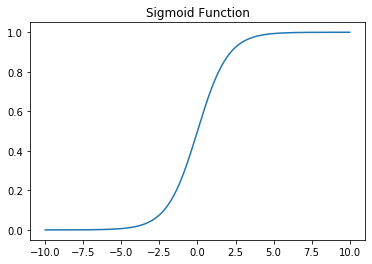

In [57]:
x = np.arange(-10,10,.001)
def sigmoid(x):
    return 1/(1+np.exp(-x))
y = sigmoid(x)
plt.plot(x,y)
plt.title("Sigmoid Function");

Hypothesis predicts y = 1 when $h_\theta (x) \geq 0.5$

Hypothesis predicts y = 0 when $h_\theta (x) \leq 0.5$

Orginally we were using a cost function:

J$(\theta)$ = $\frac{1}{N}\Sigma ^N_{i=1}0.5* \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2$

We will define "cost" function:
J$(\theta)$ = $\frac{1}{N}\Sigma ^N_{i=1} cost( h_{\theta}(x), y)$



where we can just set $h_\theta =  \frac{1}{1+e^{-\vec{\theta} \cdot \vec{x}}}$

This might be all fine and dandy. We can run gradient descent on this too. However, this is a "non-convex" function, in the sense that the non linear sigmoid function squared will produce a lot of wiggles. Gradient descent will get stuck in a local minima and not converge to a global maximum. Therefore we need something better, so we can make $J(\theta)$ convex and smooth so we can use gradient descent. 

Our new cost function for this problem:



  $$  cost(h_\theta(x),y) 
\begin{cases}
    -log(h_\theta(x)),& \text{if } y=1\\
    -log(1-h_\theta(x)),              & \text{if } y=0
\end{cases}$$

#### Some intuition of this cost function:


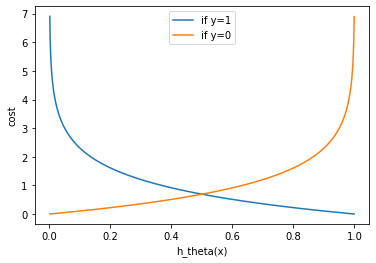

In [58]:
h_theta = np.arange(0.001,.999,.00001)
y = -np.log(h_theta)
y2 = -np.log(1-h_theta)
plt.plot(h_theta,y, label="if y=1")
plt.plot(h_theta,y2, label="if y=0")
plt.legend()
plt.xlabel("h_theta(x)")
plt.ylabel("cost");

For a concrete example lets say y=1 implies the tumor is cancerous, and y=0 implies the tumor is not. Thus, below $h_\theta(x)$ is again trying to predict between $[0,1]$ if the tumor is cancerous. The closer it is to the correct answer, the better -  

If y=1 and $h_\theta(x)$ is predicting 1, the cost goes to zero. But as we go to predicting 0, the cost function grows, increasingly higher to cause a bigger penalty. 

The reverse is also true, if y=0 and $h_\theta(x)$ is predicting 0, the cost goes to zero. 

Since y can only be 0,1 we can rewrite the cost function to:
$$cost( h_{\theta}(x), y) = -ylog(h_\theta(x)) - (1-y)log(1-h_\theta(x))$$

# Complete Logistic Regression

$$J(\theta) = \frac{1}{N}\Sigma ^N_{i=1} cost( h_{\theta}(x), y)$$
$$J(\theta) =-\frac{1}{N} \left( \Sigma ^N_{i=1} y^{(i)} log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)})) \right)$$
$$h_{\theta}(x) = \frac{1}{1+e^{-\vec{\theta} \cdot \vec{x}}}$$

Gradient Descent Algorithm:
$$\theta_{j}:=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta)$$
$$\theta_{j}:=\theta_{j}-\alpha \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$$

In [59]:
def H(x, θ): 
    return 1 / (1 + np.exp(-np.dot(x,θ)))

def cost(X, z, θ):
    sum = 0
    for i in range(len(X[1])):
        sum += z[i]*np.log(H(X[:,i], θ)) - (1-z[i])*np.log(1-H(X[:,i], θ)) 
    return 1/(2*len(X[1])) * sum
    

def multi_gradient_descent(X, z, α,tol, verbose=True):
    '''X is an [i,j] matrix where i is the number of training 
    variables and j is the number of points.
    z is the solution
    α is the learning rate, proportional to the size of steps
    tol is the tolerance of the solution accepted, evaulated 
    by the cost()'''
    
    if 
    assert len(X[0]) == len(z)
    
    X = np.vstack( (np.ones(len(X[1])), X) ) #add row of x_0's = 1
    N, N_p = X.shape #Number of θ, Number of points

    θ = rand(N)
    
    while cost(X, z, θ) > tol:
        
        if verbose: print("Cost: ",cost(X, z, θ))
        temp = np.zeros(N)
        for j in range(N):
            for i in range(N_p):
                temp += (H(X[:,i], θ) - z[i])*X[j,i]

        θ = θ - α*temp/N

    return θ

SyntaxError: invalid syntax (<ipython-input-59-e1bbe5c038cc>, line 19)

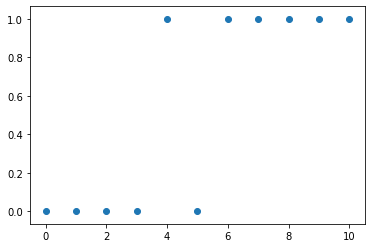

In [60]:
x = [0,1,2,3,4,5,6,7,8,9,10]
z = [0,0,0,0,1,0,1,1,1,1,1]
plt.scatter(x,z)

In [61]:
multi_gradient_descent(x, z, 0.1,2, verbose=True)

TypeError: object of type 'int' has no len()